### 토픽 모델링
- 문서 집합의 추상적인 "주제"를 발견하기 위한 통계적 모델 중 하나
- 텍스트 본문의 숨겨진 의미 구조를 발견하기 위해 사용되는 텍스트 마이닝 기법 중 하나
- 수없이 쏟아지는 비정형 텍스트의 집합을 이해하기 쉽도록 조직하고 정리할 수 있음
- 텍스트 마이닝, 유전자 정보, 이미지, 네트워크와 같은 자료에서 유의미한 구조를 발견하는데 사용됨

In [1]:
# !pip install jinja2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
# read_json 으로 url 불러오기
# 연합뉴스 기사

url = "https://raw.githubusercontent.com/KLUE-benchmark/KLUE/main/klue_benchmark/ynat-v1.1/ynat-v1.1_train.json"

df = pd.read_json(url)[['title', 'label']]
df.shape

(45678, 2)

In [4]:
df.head(3)

,title,label
0,유튜브 내달 2일까지 크리에이터 지원 공간 운영,생활문화
1,어버이날 맑다가 흐려져…남부지방 옅은 황사,생활문화
2,내년부터 국가RD 평가 때 논문건수는 반영 않는다,사회


In [5]:
df['label'].value_counts()

label
세계      8320
스포츠     7742
정치      7379
경제      6118
생활문화    5751
IT과학    5235
사회      5133
Name: count, dtype: int64

In [6]:
# normalize=True : 비율 계산
df['label'].value_counts(normalize=True)

label
세계      0.182145
스포츠     0.169491
정치      0.161544
경제      0.133938
생활문화    0.125903
IT과학    0.114607
사회      0.112374
Name: proportion, dtype: float64

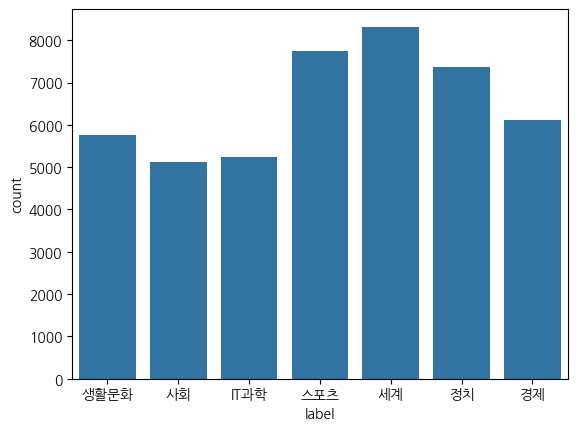

In [7]:
sns.countplot(data=df, x='label');

### TF-IDF

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
tfidf

,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None
,analyzer,'word'
,stop_words,None
,token_pattern,'(?u)\\b\\w\\w+\\b'
,ngram_range,"(1, ...)"


In [9]:
dtm = tfidf.fit_transform(df['title'])
dtm

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 174269 stored elements and shape (45678, 5000)>

In [10]:
df['label'].unique().tolist()

['생활문화', '사회', 'IT과학', '스포츠', '세계', '정치', '경제']

In [11]:
# 데이터 프레임 형태로 생성

df_dtm = pd.DataFrame(dtm.toarray(), columns=tfidf.get_feature_names_out())
df_dtm.head(2)

,00,01,02,03,10,100,100년,100만,100만명,100만원,...,흥행,희망,희비,희생자,히어로즈,힐러리,힐러리트럼프,힐만,힘으로,女배구
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: title={'center': 'TF-IDF 가중치 합'}>

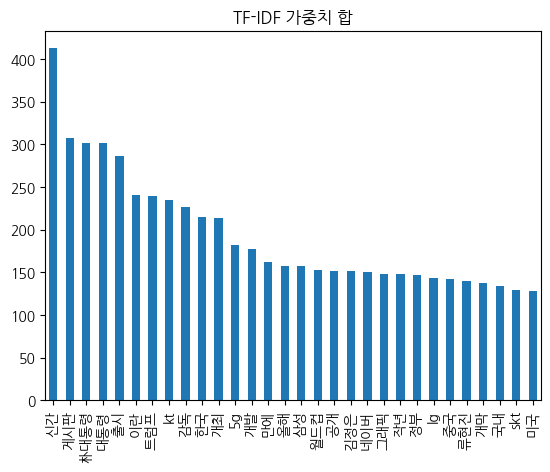

In [12]:
# 컬럼이 많으니까 가중치 합을 내서 상위 30위권까지 보기

df_dtm.sum().nlargest(30).plot(kind='bar', title="TF-IDF 가중치 합")

## LDA 토픽모델링

In [13]:
from sklearn.decomposition import LatentDirichletAllocation

LDA_MODEL = LatentDirichletAllocation(n_components=7, random_state=42)
W = LDA_MODEL.fit_transform(df_dtm)
W

array([[0.04449451, 0.0444551 , 0.04524475, ..., 0.04469549, 0.3782492 ,
        0.04465136],
       [0.0524628 , 0.05229602, 0.05229605, ..., 0.25794639, 0.05229604,
        0.05229601],
       [0.22888953, 0.04768092, 0.53269479, ..., 0.04768092, 0.04769199,
        0.04768092],
       ...,
       [0.0445737 , 0.19359759, 0.04455075, ..., 0.04455952, 0.04482674,
        0.58313365],
       [0.04462784, 0.34011127, 0.04445698, ..., 0.0445188 , 0.43736398,
        0.04446413],
       [0.03762357, 0.03764996, 0.03762073, ..., 0.03762725, 0.03761653,
        0.44410891]], shape=(45678, 7))

- W : 원본 데이터 X의 각 행이 어떻게 H의 각 행(또는 특성)의 조합으로 표현될 수 있는지를 나타냄
  - Weight matrix 또는 Basis matrix 라고 불리는 행렬을 의미
- H
  - n_components 에 지정된 수의 행을 가지며, 원본 데이터 X의 열과 동일한 수의 열을 가짐
  - 원본 데이터 X의 열(특성)을 새로운 축소된 차원의 특성으로 표현
  - Coefficient matrix 또는 Encoding matrix 라고 불리는 행렬 의미(잠재적 특성들이 원본 데이터를 어떻게 재구성하는가?)


In [14]:
# H 값 구하기

H = LDA_MODEL.components_
H

array([[ 8.29404381,  0.14285811,  0.14295877, ...,  0.14286671,
         0.14317187,  0.14286659],
       [ 0.14305165,  0.14285794,  0.14301416, ...,  0.14288728,
         0.14296383,  0.14287059],
       [ 0.14288713,  0.14329873,  0.14285841, ...,  0.1429588 ,
         0.14304   ,  0.14301055],
       ...,
       [ 0.14292918,  0.14288538,  0.14285816, ...,  0.1428787 ,
         6.46711218,  0.14286271],
       [ 0.14285782,  0.14288626,  1.31770666, ...,  0.64494793,
         0.14314918, 13.15958569],
       [ 0.143187  ,  6.18827967,  3.15489323, ...,  1.62037752,
         0.14291194,  0.14295062]], shape=(7, 5000))

In [15]:
W.shape, H.shape

((45678, 7), (7, 5000))

In [16]:
df_lda_W = pd.DataFrame(W)
df_lda_W.head()

,0,1,2,3,4,5,6
0,0.044495,0.044455,0.045245,0.398210,0.044695,0.378249,0.044651
1,0.052463,0.052296,0.052296,0.480407,0.257946,0.052296,0.052296
2,0.228890,0.047681,0.532695,0.047681,0.047681,0.047692,0.047681
3,0.048062,0.307822,0.452722,0.047783,0.048038,0.047790,0.047783
4,0.052563,0.052454,0.481462,0.052615,0.255954,0.052452,0.052499


In [22]:
df_lda_topic = pd.DataFrame(H, columns=tfidf.get_feature_names_out())
df_lda_topic.head(5)

,00,01,02,03,10,100,100년,100만,100만명,100만원,...,흥행,희망,희비,희생자,히어로즈,힐러리,힐러리트럼프,힐만,힘으로,女배구
0,8.294044,0.142858,0.142959,0.142858,3.766860,1.419748,0.142981,0.142934,0.142869,0.142917,...,1.263204,0.143178,0.143103,2.702151,0.142939,50.084617,0.143063,0.142867,0.143172,0.142867
1,0.143052,0.142858,0.143014,0.142857,0.143155,2.871950,10.544913,0.143064,0.142892,1.584240,...,0.142919,19.056674,0.142865,0.143092,0.143000,0.578891,0.142889,0.142887,0.142964,0.142871
2,0.142887,0.143299,0.142858,0.142858,4.526096,6.882007,0.143038,0.143173,0.143043,0.142891,...,1.275827,0.142899,0.142858,0.354023,0.142919,0.142896,0.142919,0.142959,0.143040,0.143011
3,0.143033,1.208982,1.192984,0.142946,24.700548,5.424727,0.143241,0.142985,0.142858,0.143373,...,5.742210,0.143268,6.067739,0.142893,0.142858,0.142878,0.142891,7.562850,0.143441,0.142862
4,0.142929,0.142885,0.142858,0.142887,3.445889,0.143182,0.143669,0.143006,0.143137,0.142897,...,0.142858,0.142920,0.143137,12.024741,0.142964,0.199536,0.142927,0.142879,6.467112,0.142863


In [24]:
df_lda_W['title'] = df['title']
df_lda_W['label'] = df['label']
df_lda_W.head(10).style.background_gradient(axis=1)

,0,1,2,3,4,5,6,title,label
0,0.044495,0.044455,0.045245,0.398210,0.044695,0.378249,0.044651,유튜브 내달 2일까지 크리에이터 지원 공간 운영,생활문화
1,0.052463,0.052296,0.052296,0.480407,0.257946,0.052296,0.052296,어버이날 맑다가 흐려져…남부지방 옅은 황사,생활문화
2,0.228890,0.047681,0.532695,0.047681,0.047681,0.047692,0.047681,내년부터 국가RD 평가 때 논문건수는 반영 않는다,사회
3,0.048062,0.307822,0.452722,0.047783,0.048038,0.047790,0.047783,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것,사회
4,0.052563,0.052454,0.481462,0.052615,0.255954,0.052452,0.052499,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간,생활문화
5,0.047731,0.394933,0.047804,0.047731,0.047813,0.047742,0.366245,야외서 생방송 하세요…액션캠 전용 요금제 잇따라,IT과학
6,0.052731,0.683423,0.052727,0.052737,0.052727,0.052915,0.052741,월드컵 태극전사 16강 전초기지 레오강 입성종합,스포츠
7,0.059366,0.059339,0.059339,0.643896,0.059382,0.059339,0.059339,미세먼지 속 출근길,생활문화
8,0.340061,0.363898,0.059202,0.059202,0.059202,0.059232,0.059202,왓츠앱稅 230원에 성난 레바논 민심…총리사퇴로 이어져종합2보,세계
9,0.275782,0.039416,0.342277,0.039386,0.039393,0.039363,0.224382,베트남 경제 고성장 지속…2분기 GDP 6.71% 성장,세계


In [29]:
# 특정 토픽 상위 키워드

df_lda_topic.loc[0].nlargest(30)

신간      412.785263
코스피      94.759388
이란       93.225758
특징주      87.089670
사우디      74.819908
규모       73.096207
트럼프      65.461326
베트남      50.408733
힐러리      50.084617
어떻게      48.835860
함께       47.964459
결정       44.751713
모든       43.888188
상승       40.647966
수주       40.531170
오후       40.203847
원내대표     36.708105
논란       36.228457
朴대통령     35.762191
경고       35.169916
2019     34.669517
조국       34.469267
유상증자     33.517185
하락       33.383192
통일부      33.335346
한국       32.627658
예멘       32.548265
공급계약     31.969521
출발       31.821349
카드뉴스     31.580124
Name: 0, dtype: float64

<Axes: >

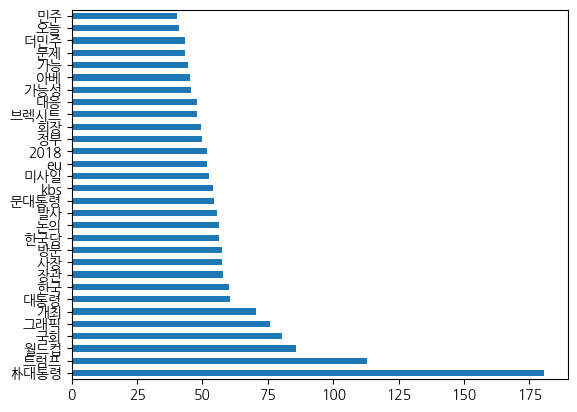

In [28]:
df_lda_topic.loc[1].nlargest(30).plot.barh()

In [34]:
# 주제별로 상위 키워드 시각화

def plot_top_words(model, feature_name, n_top_words, title, n_topics=5):
    # 데이터 프레임 생성
    df_topic = pd.DataFrame(model.components_, columns=feature_name)

    # sharex : x 축을 공유하냐는 의미
    fig, axex = plt.subplots(1, n_topics, figsize=(6 * n_topics, 15), sharex=True)
    axex = axex.flatten()

    for topic_idx in df_lda_topic.index:
        ax = axex[topic_idx]
        df_topic.loc[topic_idx].nlargest(n_top_words).plot.barh(ax=ax)
        ax.invert_yaxis()
        ax.set_title(f"Topic {topic_idx + 1}", fontdict={"fontsize":20})
        ax.tick_params(axis='both', which='major', labelsize=15)
        for i in "top right".split():
            ax.spines[i].set_visible(False)

        fig.suptitle(title, fontsize=30)
        plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.9, hspace=0.3)

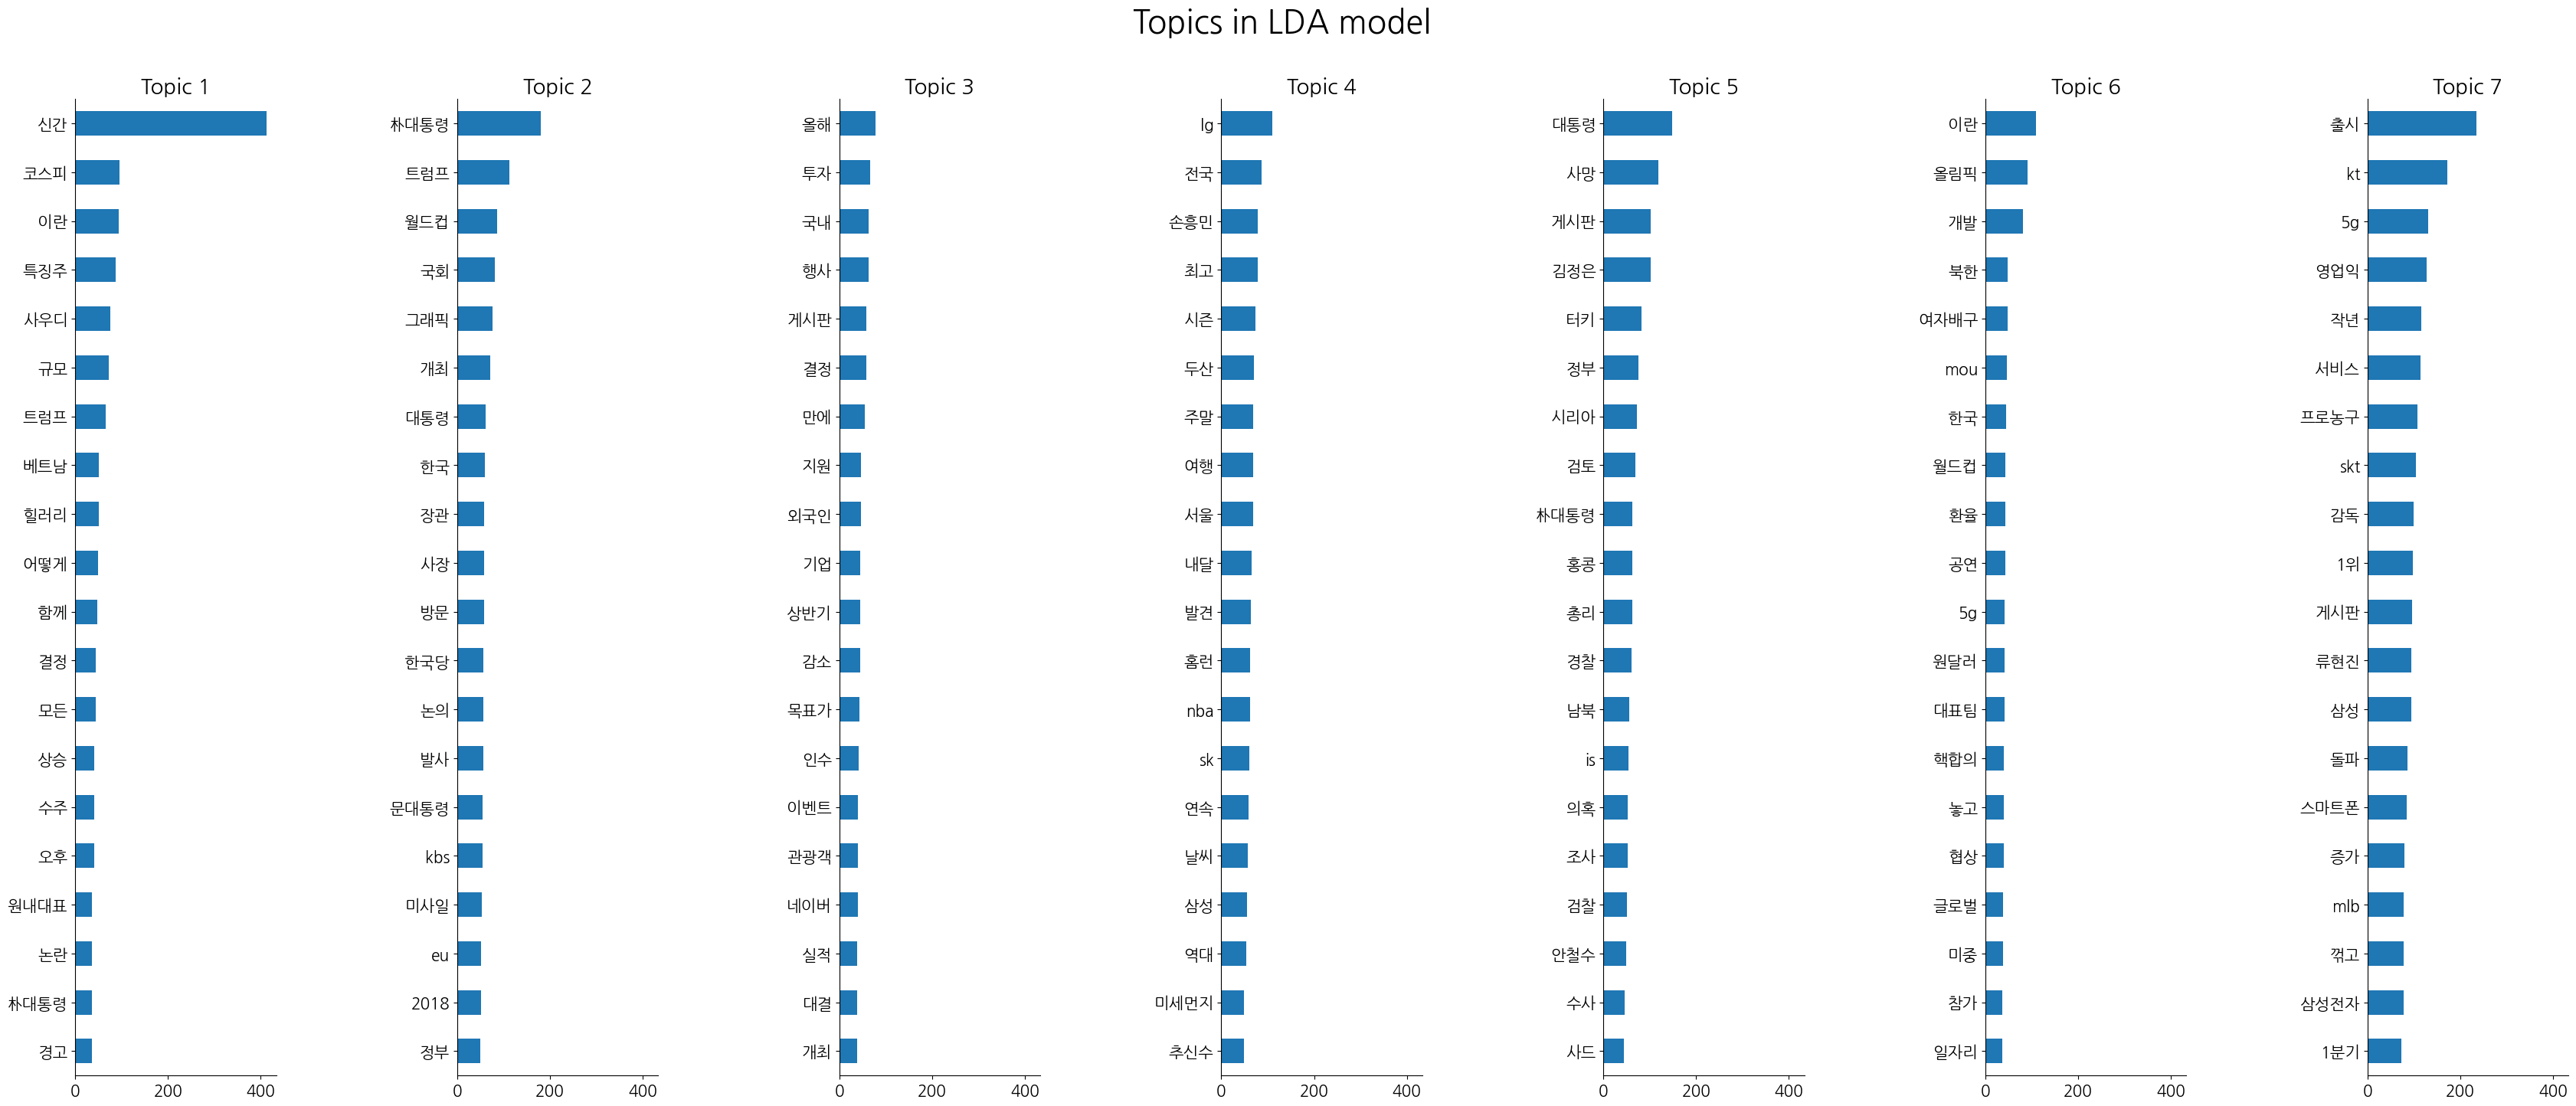

In [35]:
plot_top_words(LDA_MODEL, tfidf.get_feature_names_out(), 20, "Topics in LDA model", n_topics=7)

## NMF(Non-Negative Matrix Factorization) 토픽모델링
* https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html#sklearn-decomposition-nmf
* 행렬분해기법

In [36]:
from sklearn.decomposition import NMF

NMF_MODEL = NMF(n_components=7, random_state=42)
W = NMF_MODEL.fit_transform(df_dtm)
H = NMF_MODEL.components_

In [37]:
W.shape, H.shape

((45678, 7), (7, 5000))

In [39]:
df_nmf_W = pd.DataFrame(W)
df_nmf_W['title'] = df['title']
df_nmf_W['label'] = df['label']
df_nmf_W.head(20).style.background_gradient(axis=1)

,0,1,2,3,4,5,6,title,label
0,0.000068,0.003890,0.001003,0.000000,0.004053,0.002601,0.008402,유튜브 내달 2일까지 크리에이터 지원 공간 운영,생활문화
1,0.000000,0.000000,0.000031,0.000000,0.000000,0.000050,0.000283,어버이날 맑다가 흐려져…남부지방 옅은 황사,생활문화
2,0.000000,0.000086,0.000701,0.000406,0.000152,0.000582,0.000793,내년부터 국가RD 평가 때 논문건수는 반영 않는다,사회
3,0.000060,0.000594,0.000806,0.002340,0.000000,0.000726,0.004820,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것,사회
4,0.000262,0.001051,0.000036,0.000097,0.000029,0.000253,0.000910,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간,생활문화
5,0.000000,0.000315,0.000000,0.000000,0.010482,0.000643,0.004829,야외서 생방송 하세요…액션캠 전용 요금제 잇따라,IT과학
6,0.000000,0.000000,0.000319,0.001203,0.000000,0.001039,0.010701,월드컵 태극전사 16강 전초기지 레오강 입성종합,스포츠
7,0.000000,0.000276,0.000383,0.000103,0.000203,0.000165,0.002039,미세먼지 속 출근길,생활문화
8,0.000000,0.000000,0.000934,0.001147,0.000000,0.002150,0.000138,왓츠앱稅 230원에 성난 레바논 민심…총리사퇴로 이어져종합2보,세계
9,0.000084,0.000000,0.002762,0.000270,0.000000,0.001424,0.010515,베트남 경제 고성장 지속…2분기 GDP 6.71% 성장,세계


## 토픽별 워드클라우드

* https://github.com/amueller/word_cloud

In [41]:
font_path = r"c:/windows/Fonts/malgun.ttf"

In [42]:
from wordcloud import WordCloud

# 워드클라우드 생성하는 함수
def draw_wordclouds(topic_words, topic_idx, font_path=font_path):

    # 워드클라우드 불러오기
    wordcloud = WordCloud(width=800, height=400,
                          background_color='white',
                          font_path=font_path,
                         ).generate_from_frequencies(topic_words)

    # 워드클라우드 시각화
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {topic_idx+1}', fontsize=20)
    plt.axis("off")
    plt.show()

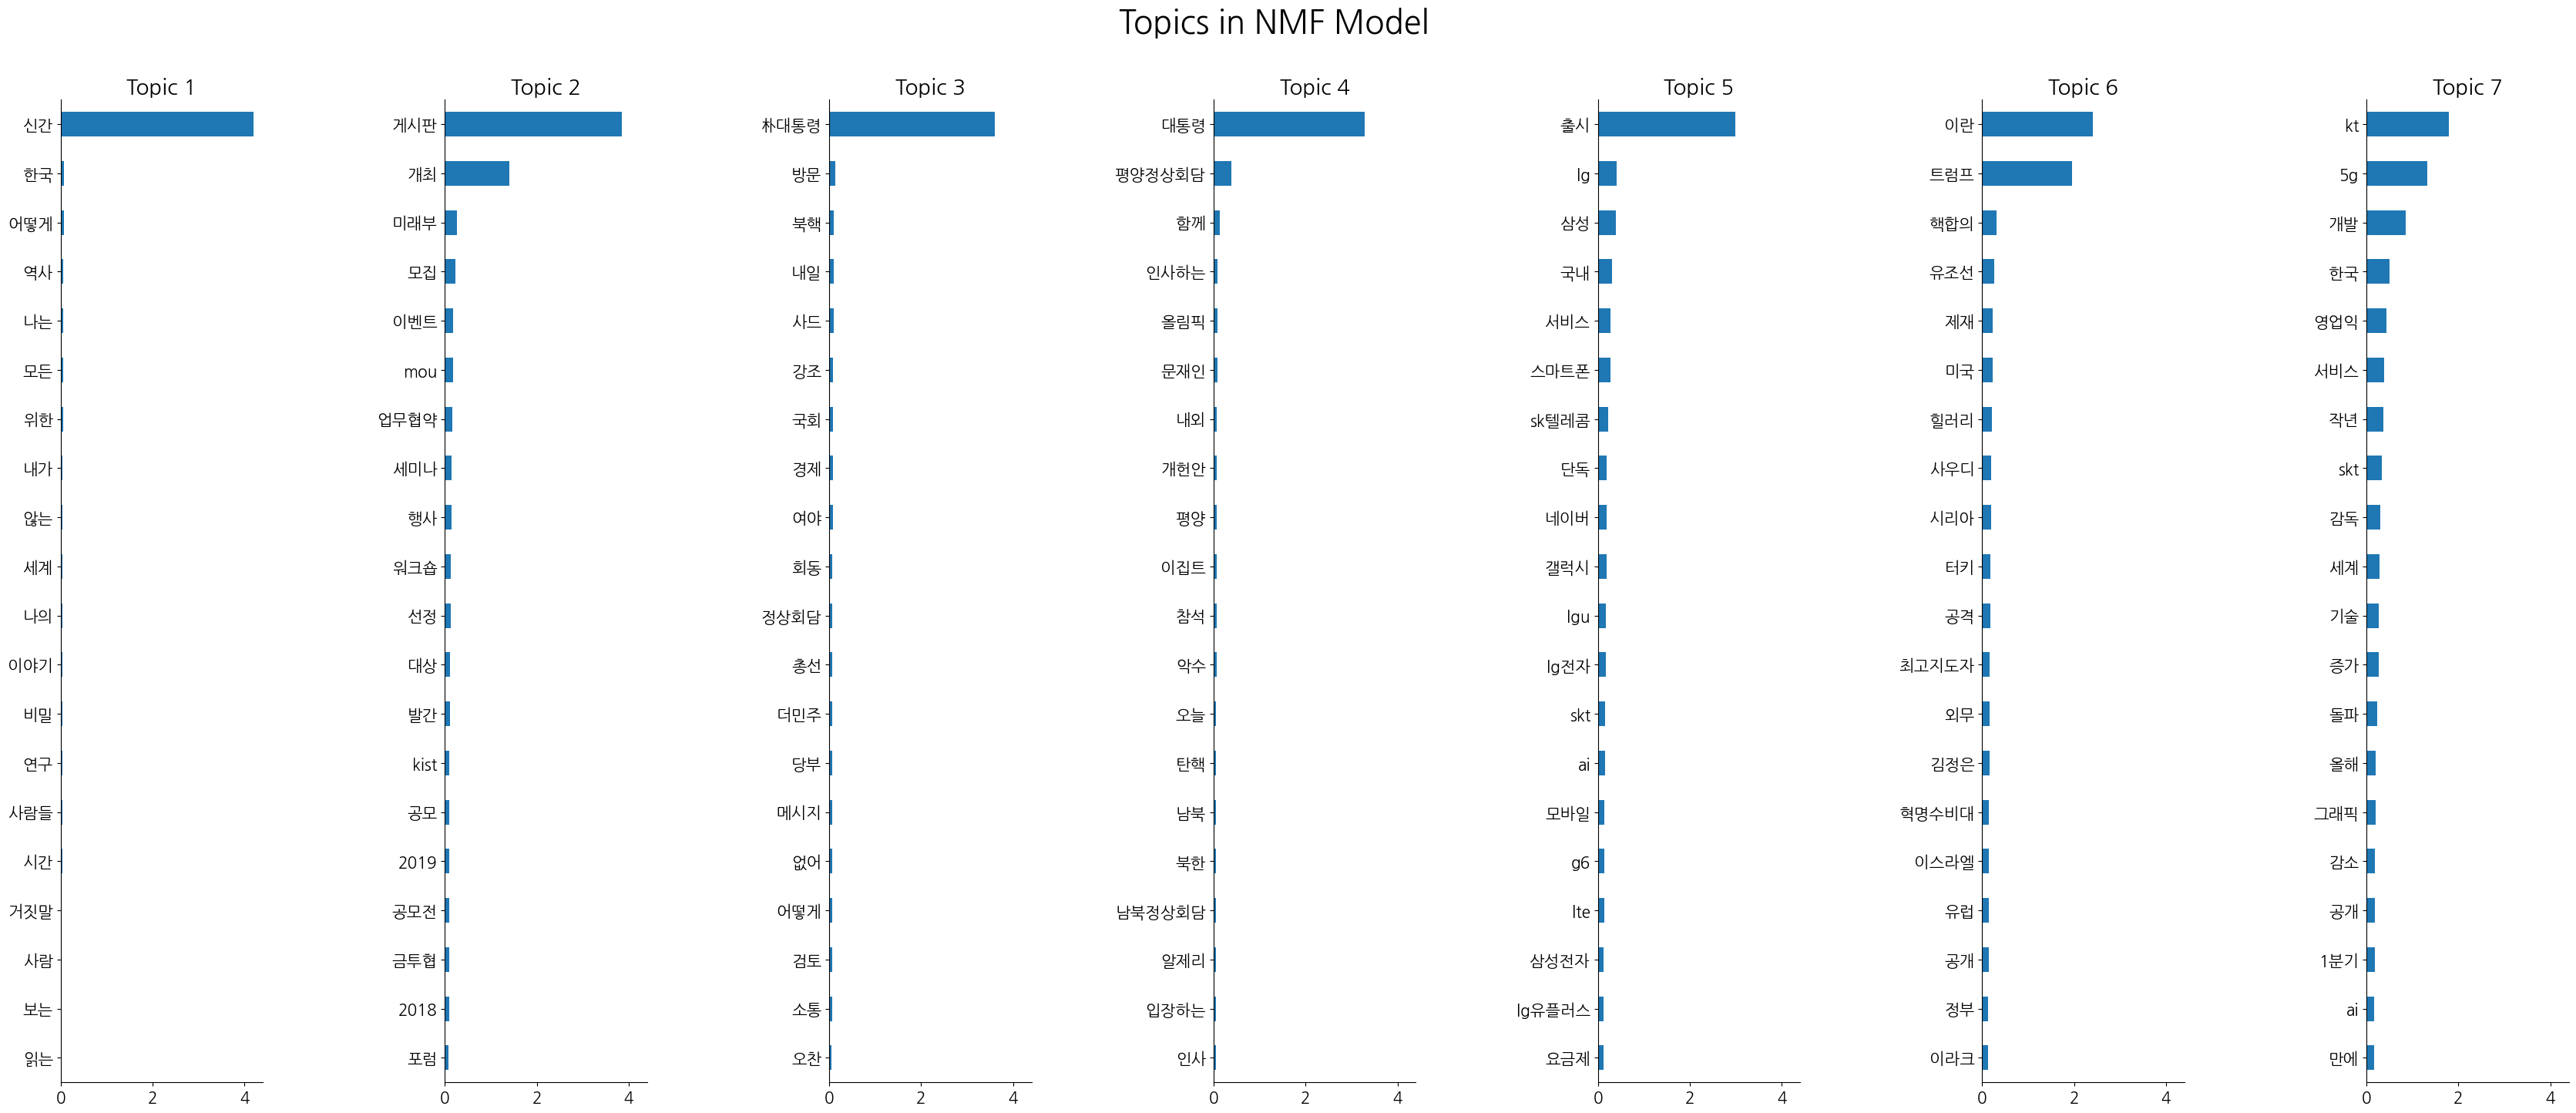

In [43]:
plot_top_words(NMF_MODEL, tfidf.get_feature_names_out(), 20, "Topics in NMF Model", n_topics=7)

## CountVectorizer